# Grupo 5

**Integrantes:** Carolina Villa - Manuel Casella - Joaquin Vera - Guido Delfino - Fabricio Neyra

# Desafio 3 - Predicción de Fraude en Transacciones de Ethereum Aplicando Modelos de Clasificación
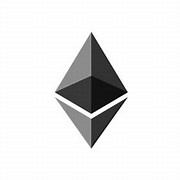


## Introducción

Ethereum es una plataforma open source, descentralizada a diferencia de otras cadenas de bloques, Ethereum puede hacer mucho más. Es programable, lo que significa que los desarrolladores pueden usarlo para crear nuevos tipos de aplicaciones .

Estas aplicaciones descentralizadas (o "dapps") obtienen los beneficios de la criptomoneda y la tecnología blockchain. Son confiables y predecibles, lo que significa que una vez que se "cargan" en Ethereum, siempre se ejecutarán según lo programado. Pueden controlar los activos digitales para crear nuevos tipos de aplicaciones financieras. Se pueden descentralizar, lo que significa que ninguna entidad o persona los controla.

**El grupo DH5** tuvo acceso a una base de datos de transacciones fraudulentas de contratos Ethereum y se propuso:
- Crear un modelo robusto que permita garantizar a los proveedores de wallets la predicción de transacciones fraudulentas en su operatoria

Más información? Accede a los siguientes links: 
- https://es.wikipedia.org/wiki/Ethereum
- Ethereum Fraud Detection Dataset (https://www.kaggle.com/vagifa/ethereum-frauddetection-dataset)

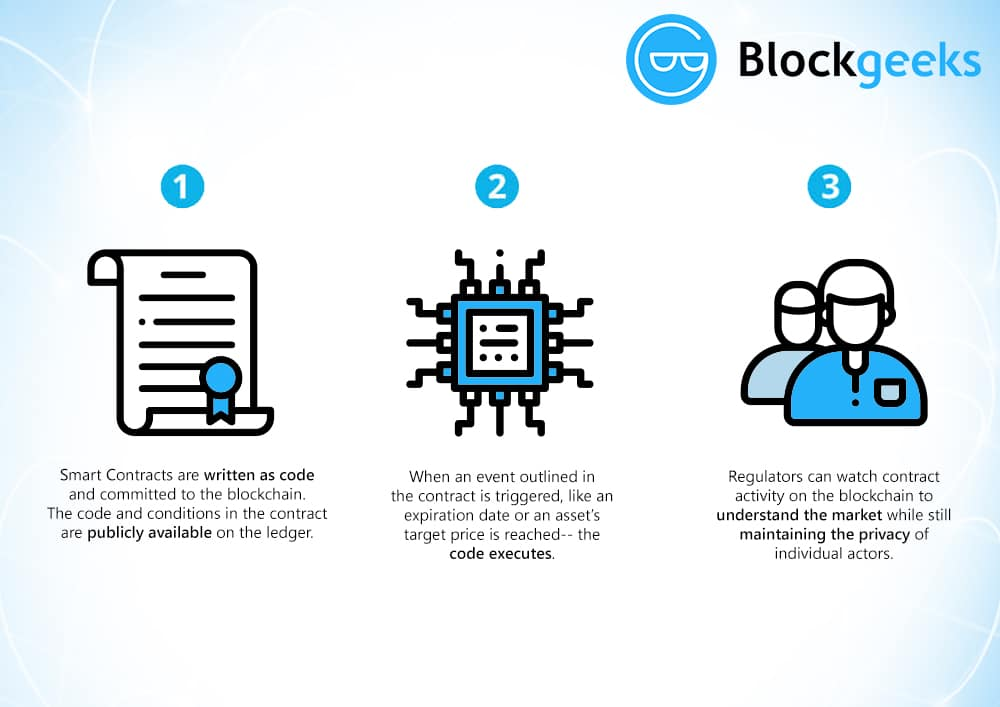


### Índice

# Indice
[1- Importación de Librerías](#section_librerias)

[2- Importación del Dataset. Descripción de Features y EDA (Análisis de Nulos, Review de variables Categóricas)](#section_dataset)

[3- Modelos](#section_modelos)
[3.1- Pipeline + GridSearch/RandomSearch](#section_modelos)

[4- Evaluación de Modelo Resultante y revisión del Umbral de Clasificación Óptimo](#section_eval)


<a id="section_librerias"></a> 
## Import Libraries

In [3]:
#Data Analysis
import numpy as np
import pandas as pd

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Medición de Tiempo
import timeit

#Machine Learning con SKLearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import binarize

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


import warnings
warnings.filterwarnings('ignore')


<a id="section_dataset"></a> 
## Import Dataset

In [4]:
url= 'transaction_dataset.csv'
data = pd.read_csv(url, error_bad_lines=False)

### Initial Features Description
- Address: the address of the ethereum account

- FLAG: whether the transaction is fraud or not

- Avg min between sent tnx: Average time between sent transactions for account in minutes

- Avgminbetweenreceivedtnx: Average time between received transactions for account in minutes

- TimeDiffbetweenfirstand_last(Mins): Time difference between the first and last transaction

- Sent_tnx: Total number of sent normal transactions

- Received_tnx: Total number of received normal transactions

- NumberofCreated_Contracts: Total Number of created contract transactions

- UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transactions

- UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions

- MinValueReceived: Minimum value in Ether ever received

- MaxValueReceived: Maximum value in Ether ever received

- AvgValueReceived: Average value in Ether ever received

- MinValSent: Minimum value of Ether ever sent

- MaxValSent: Maximum value of Ether ever sent

- AvgValSent: Average value of Ether ever sent

- MinValueSentToContract: Minimum value of Ether sent to a contract

- MaxValueSentToContract: Maximum value of Ether sent to a contract

- AvgValueSentToContract: Average value of Ether sent to contracts

- TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions

- TotalEtherSent:Total Ether sent for account address

- TotalEtherReceived: Total Ether received for account address

- TotalEtherSent_Contracts: Total Ether sent to Contract addresses

- TotalEtherBalance: Total Ether Balance following enacted transactions

- TotalERC20Tnxs: Total number of ERC20 token transfer transactions

- ERC20TotalEther_Received: Total ERC20 token received transactions in Ether

- ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether

- ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether

- ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses

- ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses

- ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses

- ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes

- ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes

- ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions

- ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account

- ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account

- ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account

- ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account

- ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account

- ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account

- ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred

- ERC20UniqRecTokenName: Number of Unique ERC20 tokens received

- ERC20MostSentTokenType: Most sent token for account via ERC20 transaction

- ERC20MostRecTokenType: Most received token for account via ERC20 transactions

In [5]:
data=data.drop(['Unnamed: 0','Index'],axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### Balance de Variable Target

In [6]:
data.FLAG.value_counts(normalize=True)

0    0.778579
1    0.221421
Name: FLAG, dtype: float64

### Análisis de Nulos

In [7]:
null_mask= data.isna().sum() > 0
data.isna().sum()

Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract              

## Limpieza de Nulos

In [9]:
data_clean= data.dropna()
data_clean.FLAG.value_counts()

0    7631
1    1350
Name: FLAG, dtype: int64

### Análisis de Variables Categóricas

In [10]:
categorical_columns= ['Address',' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']
for i in categorical_columns:

    print('La variable ',i,' presenta ',len(data_clean[i].unique()),' valores.')

print('Luego se decide inicialmente quitarlas del grupo de features.')

La variable  Address  presenta  8956  valores.
La variable   ERC20 most sent token type  presenta  305  valores.
La variable   ERC20_most_rec_token_type  presenta  467  valores.
Luego se decide inicialmente quitarlas del grupo de features.


In [11]:
#A modo de prueba quitamos las tres variables categóricas que parecen no influir en el target
data_clean=data_clean.drop(['Address',' ERC20 most sent token type',
       ' ERC20_most_rec_token_type'],axis=1)

<a id="section_modelos"></a> 
## Modelos

In [12]:
#Separamos 
X= data_clean.drop("FLAG",axis=1)
y= data_clean['FLAG']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, random_state = 1237)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6286, 45)
(2695, 45)
(6286,)
(2695,)


### Pipeline + GridSearch

In [14]:
pasos = [('scaler', StandardScaler()), 
         ('pca', PCA()),
         ('estimator', KNeighborsClassifier())]

In [2]:
"""
Next Steps:

Done! 1- Corregir PCA de 2 a 45
Done! 2- Buscar solvers de LogReg para buscar óptimo
3- Entender el negocio! Usar modelos con opt. de hiperp./scalers para ganar visibilidad del peso de las variables
4- Estudiar PCA 1 y 2 como más representativas para entender cuáles son las var. iniciales con más peso

Gráficos:
- Nuloss?
- ViolinPlot?

StoryTelling:
- Intro a ETH
- Gráfica de Pipeline

Frutilla del postre:
- Nuevo Pipeline, con RNF pca, sumando una clase que transforme usando el umbral

"""

'\nNext Steps:\n\n1- Corregir PCA de 2 a 45\n2- Buscar solvers de LogReg para buscar óptimo\n3- Entender el negocio! Usar modelos con opt. de hiperp./scalers para ganar visibilidad del peso de las variables\n4- Estudiar PCA 1 y 2 como más representativas para entender cuáles son las var. iniciales con más peso\n\nGráficos:\n- Nuloss?\n- ViolinPlot?\n\nStoryTelling:\n- Intro a ETH\n- Gráfica de Pipeline\n\nFrutilla del postre:\n- Nuevo Pipeline, con RNF pca, sumando una clase que transforme usando el umbral\n\n'

In [17]:
pipe_random = Pipeline(pasos)

In [18]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

parameters = [
    {
        'scaler': [StandardScaler(), MinMaxScaler(), None],
        'pca__n_components': range(2,46,1),
        'estimator':[KNeighborsClassifier()],
        'estimator__n_neighbors': range(2, 20, 2),
        'estimator__weights': ['uniform', 'distance']
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler(), None],
        'pca__n_components': range(2,46,1),
        'estimator':[LogisticRegression(max_iter=300)],
        'estimator__solver':['liblinear','newton-cg','lbfgs','sag','saga'],
        'estimator__C' : np.logspace(0, 4, 10),
        'estimator__penalty': ['l1', 'l2'],
        'estimator__class_weight': ["balanced", None]
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler(), None],
        'pca__n_components': range(2,46,1),
        'estimator':[RandomForestClassifier()],
        'estimator__n_estimators': range(1, 101),
        'estimator__criterion': ['gini', 'entropy']
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler(), None],
        'pca__n_components': range(2,46,1),
        'estimator':[GaussianNB()]
    }
]


In [19]:
random = RandomizedSearchCV(pipe_random, parameters, cv=folds)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('estimator',
                                              KNeighborsClassifier())]),
                   param_distributions=[{'estimator': [KNeighborsClassifier()],
                                         'estimator__n_neighbors': range(2, 20, 2),
                                         'estimator__weights': ['uniform',
                                                                'distance'],
                                         'pca__n_components': ra...
                                         'scaler': [StandardScaler(),
                                                    MinMaxScaler(), None]},
                                        {'estimator': [RandomForestClassifier(n_estimators=64)],
                       

<a id="section_eval"></a> 
## Evaluación del Modelo Resultante

In [20]:
print('el mejor modelo de prueba fue', random.best_estimator_)

print ('el mejor score fue', random.best_score_)

el mejor modelo de prueba fue Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=30)),
                ('estimator', RandomForestClassifier(n_estimators=64))])
el mejor score fue 0.9575253619476559


In [21]:
y_predict = random.best_estimator_.predict(X_test)

In [22]:
print('Con una métrica de sensibilidad de', recall_score(y_test, y_predict))

Con una métrica de sensibilidad de 0.8444444444444444


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2290
           1       0.95      0.84      0.89       405

    accuracy                           0.97      2695
   macro avg       0.96      0.92      0.94      2695
weighted avg       0.97      0.97      0.97      2695



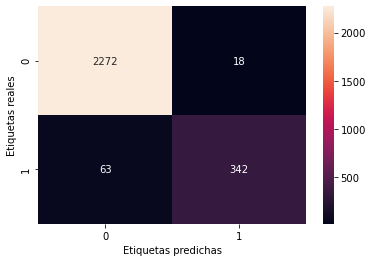

In [25]:
#Calculemos la matriz de confusión:
conf_mat = confusion_matrix(y_test, y_predict)

# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

### Análisis de Umbrales de Decisión

In [26]:
#Definimos una función para evaluar el cambio de umbrales

def umbral_decision (lista_umbrales, model, X_test,): 
    recall = []
    accuracy = []
    precision = []
    y_pred_proba = model.predict_proba(X_test)
    y_probs_logit_left = y_pred_proba[:,1]
    for n in lista_umbrales:
        y_pred_logit = binarize(y_pred_proba, n)[:,1]
        y_pred_logit = (y_probs_logit_left > n).astype(int)
        recall.append(recall_score(y_test,y_pred_logit))
        accuracy.append(accuracy_score(y_test,y_pred_logit))
        precision.append(precision_score(y_test, y_pred_logit))
    return list(recall), list(accuracy), list(precision)

In [27]:
lista_umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
analisis_umbrales = umbral_decision(lista_umbrales,random, X_test)

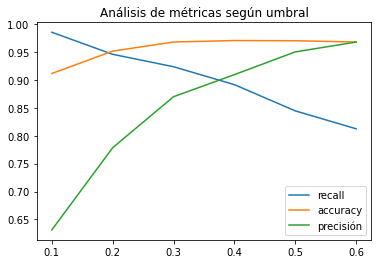

In [28]:
plt.plot(lista_umbrales,analisis_umbrales[0])
plt.plot(lista_umbrales,analisis_umbrales[1])
plt.plot(lista_umbrales,analisis_umbrales[2])
labels = ['recall', 'accuracy', 'precisión']
plt.legend(labels)
plt.title('Análisis de métricas según umbral')
plt.show()

In [29]:
y_pred_proba = random.predict_proba(X_test)
# Nos quedamos con la columna que tiene la probabilidad positiva de cada caso
y_probs_logit_left = y_pred_proba[:,1]

#reducimos el umbral de decision a 0.35 luego de analizar la gráfica:
y_pred_logit = binarize(y_pred_proba, 0.35)[:,1]
y_pred_logit = (y_probs_logit_left > 0.35).astype(int)

In [30]:
print('La métrica de sensibilidad mejoró a', recall_score(y_test, y_pred_logit))

La métrica de sensibilidad mejoró a 0.908641975308642


In [31]:
print('La métrica de mejoró cambió a', accuracy_score(y_test, y_pred_logit))

La métrica de mejoró cambió a 0.9699443413729129


In [32]:
print('La métrica de precision mejoró a', precision_score(y_test, y_pred_logit))

La métrica de precision mejoró a 0.8932038834951457


In [33]:
print (classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2290
           1       0.89      0.91      0.90       405

    accuracy                           0.97      2695
   macro avg       0.94      0.94      0.94      2695
weighted avg       0.97      0.97      0.97      2695



Text(0.5, 1.0, 'Nueva matriz')

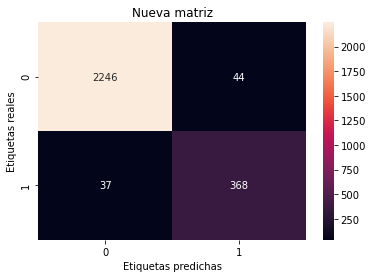

In [34]:
# Graficamos la nueva matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_logit), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');
plt.title('Nueva matriz')